In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("C:/Users/user/Desktop/KPMG_VI_New_raw_data_update_final(customer demographic).csv",encoding='latin-1')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,12-10-1953,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,16-12-1980,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,20-01-1954,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,03-10-1961,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,13-05-1977,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [38]:
df.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [39]:
df["gender"].replace({"Femal" : "Female", "M" : "Male"},inplace=True)

In [40]:
df.gender.unique()

array(['F', 'Male', 'Female', 'U'], dtype=object)

In [41]:
df["gender"].replace({"F" : "Female"},inplace=True)

In [42]:
df.gender.unique()

array(['Female', 'Male', 'U'], dtype=object)

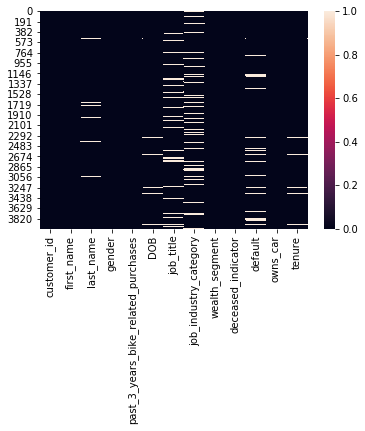

In [43]:
sns.heatmap(df.isnull())

In [44]:
df = df.dropna(subset = ["default"],axis =0)

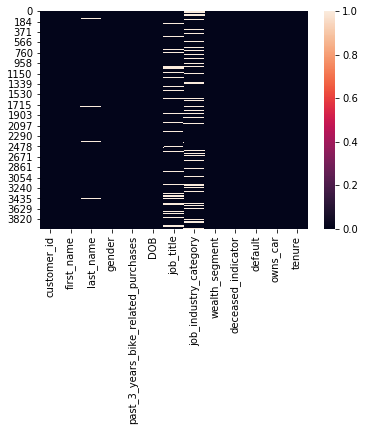

In [45]:
sns.heatmap(df.isnull())

In [46]:
df["DOB"] = pd.to_datetime(df["DOB"], errors = "coerce")
now = pd.to_datetime("now")
now

Timestamp('2020-06-13 17:25:57.865618')

In [47]:
df["Age"] = (now - df["DOB"]).astype("<m8[Y]")
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0,66.0
3,4,Talbot,NaN,Male,33,1961-03-10,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,59.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,43.0


In [48]:
df = df.drop(columns = "default", axis = 1)

In [49]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0
3,4,Talbot,NaN,Male,33,1961-03-10,NaN,IT,Mass Customer,N,No,7.0,59.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43.0


In [50]:
df.drop(df[df['deceased_indicator'] == "Y"].index, inplace=True)

In [51]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0
3,4,Talbot,NaN,Male,33,1961-03-10,NaN,IT,Mass Customer,N,No,7.0,59.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43.0


In [52]:
x = df["gender"]

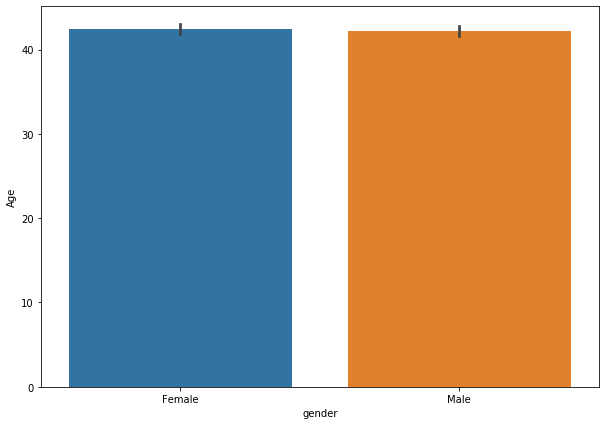

In [53]:
plt.figure(figsize=(10,7))
sns.barplot(x="gender", y="Age", data = df)